In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters
pg_params = {
    "host": "##",
    "database": "postgres",
    "user": "##",
    "password": "##"
}
engine = create_engine(f'postgresql://{pg_params["user"]}:{pg_params["password"]}@{pg_params["host"]}/{pg_params["database"]}')

query = """
SELECT *
FROM suicide
ORDER BY year_num;
"""
df_suicide = pd.read_sql(query, engine)

df_suicide.head()

/Users/punyakn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,indicator,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate
0,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,25-44 years,1.3,1950,1,25-44 years,3,11.6
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1950,1,All ages,0,7.5
2,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,15-24 years,1.2,1950,1,15-24 years,2,4.5
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1950,1,All ages,0,7.5
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1950,1,All ages,0,21.2


Trend of Suicide Rates Over the Years

/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


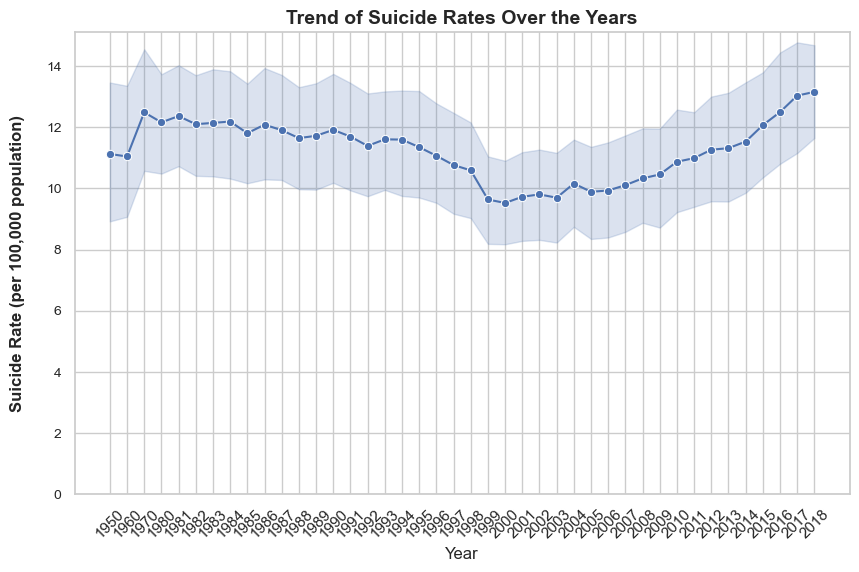

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_suicide_sorted = df_suicide.sort_values('year')

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='year', y='estimate', data=df_suicide_sorted, marker='o')
plt.title('Trend of Suicide Rates Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicide Rate (per 100,000 population)', fontsize=12, fontweight='bold', labelpad=15)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
ax.set_ylim(bottom=0) 
plt.show()


Yearly Change in Suicide Rates

In [5]:
# Convert 'estimate' column to numeric data type
df_suicide['estimate'] = pd.to_numeric(df_suicide['estimate'], errors='coerce')

# Fill missing values using forward fill method
df_suicide['estimate'].fillna(method='ffill', inplace=True)

# Recalculate the yearly change after filling missing values
df_suicide['yearly_change'] = df_suicide['estimate'].diff()


/var/folders/1x/1r28j75911vfwy063445dwjh0000gn/T/ipykernel_43426/3708526778.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_suicide['estimate'].fillna(method='ffill', inplace=True)
/var/folders/1x/1r28j75911vfwy063445dwjh0000gn/T/ipykernel_43426/3708526778.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_suicide['estimate'].fillna(method='ffill', inplace=True)


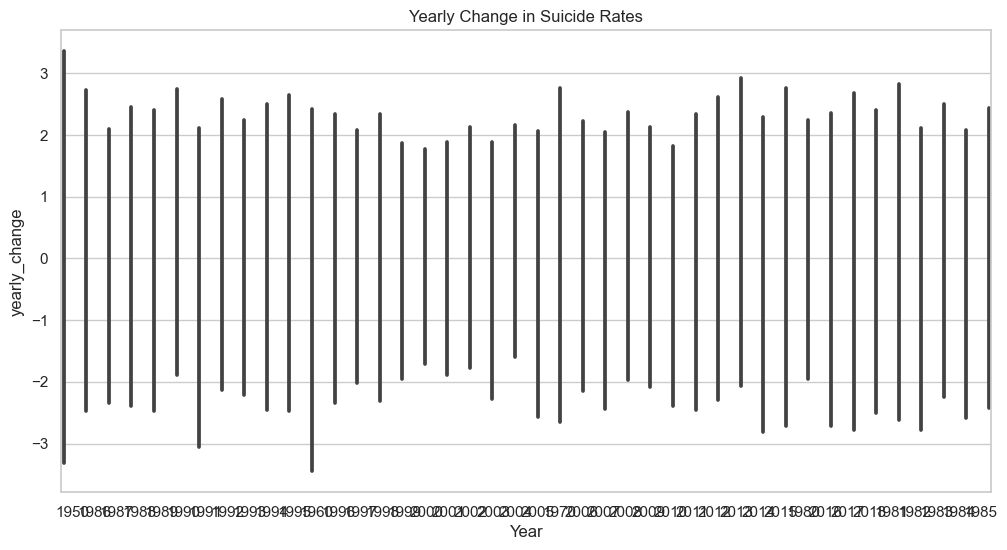

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_suicide, x='year', y='yearly_change', palette='viridis', hue='year')
plt.title('Yearly Change in Suicide Rates')
plt.xlabel('Year')

# Remove the legend if it's not needed
plt.gca().legend().remove()


Moving Average of Suicide Rates

/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


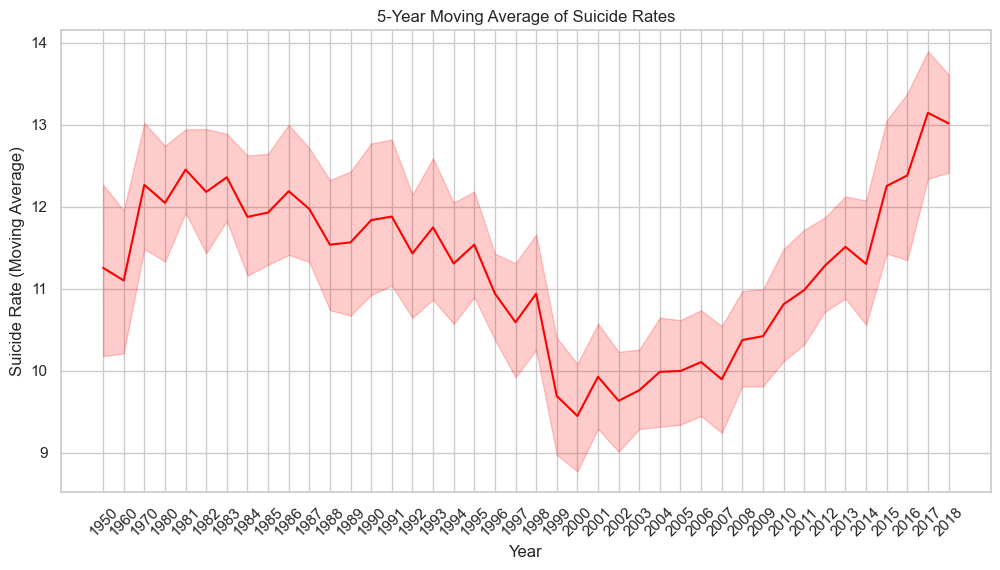

In [12]:
# Sort the DataFrame by the 'year' column to ensure chronological order
df_suicide_sorted = df_suicide.sort_values('year')

# Calculate the 5-year moving average
df_suicide_sorted['moving_average'] = df_suicide_sorted['estimate'].rolling(window=5).mean()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_suicide_sorted, x='year', y='moving_average', color='red')
plt.title('5-Year Moving Average of Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Moving Average)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Distribution of suicide rates.

/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


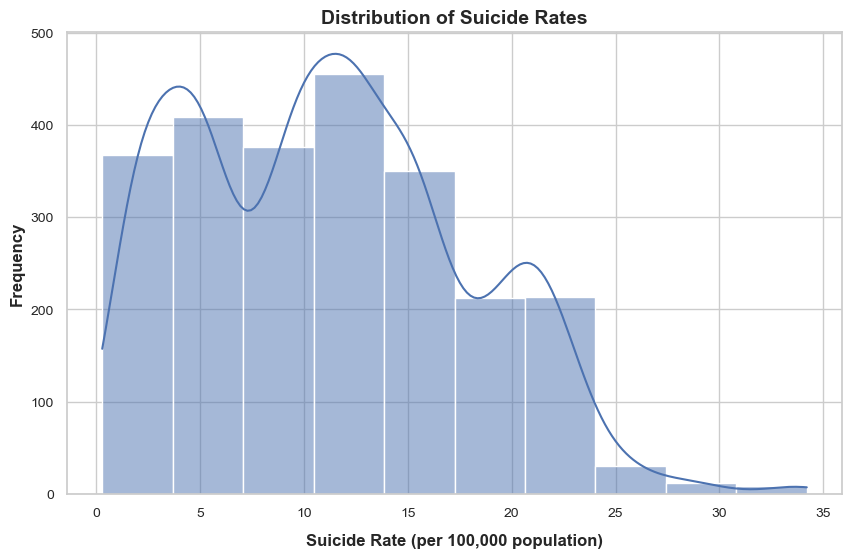

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(df_suicide['estimate'], bins=10, kde=True)

# Title and axis labels
plt.title('Distribution of Suicide Rates', fontsize=14, fontweight='bold')
plt.xlabel('Suicide Rate (per 100,000 population)', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Tick customization
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


Suicide Rates By Decade

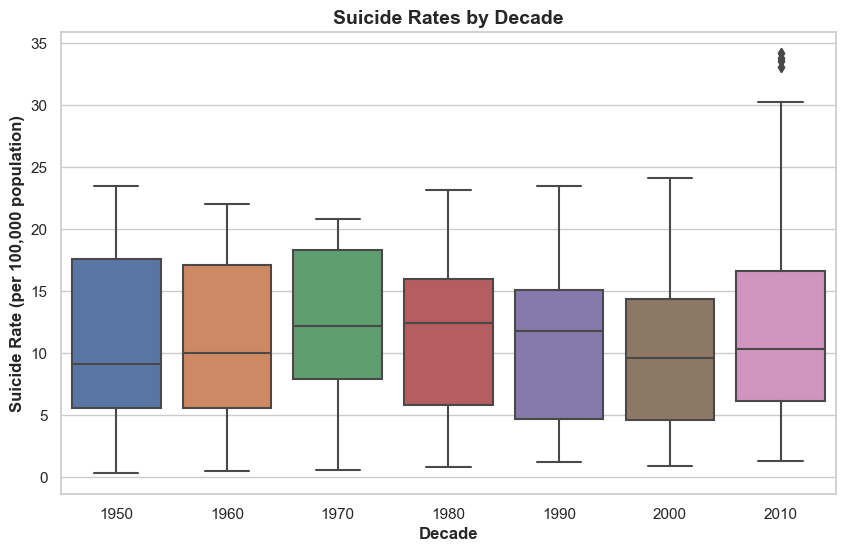

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_suicide['decade'] = (df_suicide['year'].astype(int) // 10) * 10

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_suicide, x='decade', y='estimate')
plt.title('Suicide Rates by Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12, fontweight='bold')
plt.ylabel('Suicide Rate (per 100,000 population)', fontsize=12, fontweight='bold')

plt.show()
